# Table of Contents
1. [Imports](#Imports)
2. [Reading in the Data](#Reading-in-the-Data)
3. [Data Cleaning and EDA for Reddit](#Data-Cleaning-and-EDA-for-Reddit)
	1. [Data Visualization](#Data-Visualization)
	2. [Word Counts](#Word-Counts)
	3. [Frequently Used Words Using CountVectorizer](#Frequently-Used-Words-Using-CountVectorizer)
		1. [Bi-grams](#Bi-grams)
4. [Data Cleaning and EDA for Twitter](#Data-Cleaning-and-EDA-for-Twitter)
	1. [Data Visualization](#Data-Visualization)
	2. [Word Counts](#Word-Counts)
	3. [Frequently Used Words Using CountVectorizer](#Frequently-Used-Words-Using-CountVectorizer)
		1. [Bi-grams](#Bi-grams)
5. [EDA for COVID-19 Policies](#EDA-for-COVID-19-Policies)
	1. [Reopening](#Reopening)
	2. [Stay at Home](#Stay-at-Home)
	3. [Large Gatherings Ban](#Large-Gatherings-Ban)
	4. [Restaurant Limits](#Restaurant-Limits)
	5. [Bar closures](#Barclosures)
	6. [Face Coverings](#Face-Coverings)
	7. [Emergency Declaration](#Emergency-Declaration)
6. [Cleaning for COVID-19 Health Data](#Cleaning-for-COVID-19-Health-Data)


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# Reading in the Data

In [2]:
first_states = pd.read_csv('./data/first_25_states.csv')

In [3]:
last_states = pd.read_csv('./data/last_25_states.csv')

In [4]:
policies = pd.read_csv('./data/policies.csv')

In [5]:
first_states.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
0,CoronavirusAlabama,guarea,"After public apology, Montgomery councilman’s ...",NaN,1,1593606973,alabama,2020-07-01 08:36:13
1,CoronavirusAlabama,guarea,University of Alabama graduate tells his COVID...,NaN,1,1593607132,alabama,2020-07-01 08:38:52
2,CoronavirusAlabama,guarea,Tuscaloosa adopts face mask law for public spaces,NaN,1,1593608257,alabama,2020-07-01 08:57:37
3,CoronavirusAlabama,guarea,Coin shortage due to coronavirus: What’s happe...,NaN,0,1593615060,alabama,2020-07-01 10:51:00
4,CoronavirusAlabama,houyam-love,[Study Results] How is Coronavirus Pandemic Af...,NaN,1,1593621148,alabama,2020-07-01 12:32:28


In [6]:
first_states.shape

(5755, 8)

In [7]:
last_states.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
0,CoronavirusMontana,janeemarii,Montana Coronavirus Report | Montana Free Press,NaN,1,1594334770,montana,2020-07-09 16:46:10
1,CoronavirusMontana,janeemarii,Montana's Covid-19 Testing Information,NaN,1,1594502716,montana,2020-07-11 15:25:16
2,CoronavirusMontana,theeaglesfamski,Bullock announces mask requirements,NaN,1,1594846455,montana,2020-07-15 14:54:15
3,CoronavirusMontana,janeemarii,Helena High summer school goes online after st...,NaN,9,1595295829,montana,2020-07-20 19:43:49
4,CoronavirusMontana,BrightscapesArt,Art Project: Having Fun During Coronavirus,NaN,1,1595939075,montana,2020-07-28 06:24:35


In [8]:
last_states.shape

(4084, 8)

# Data Cleaning and EDA for Reddit

In [9]:
df = pd.concat([first_states, last_states])

In [10]:
df.reset_index(drop = True, inplace=True)

In [11]:
df.shape

(9839, 8)

In [12]:
df.isna().sum()

subreddit          0
author             0
title              0
selftext        6505
score              0
created_utc        0
state              0
eastern_time       0
dtype: int64

In [13]:
def clean_title(title_cell):
    if title_cell == '[removed]':
        return np.nan
    elif title_cell == '[deleted]':
        return np.nan
    else:
        return title_cell

In [14]:
df['title'] = df['title'].map(clean_title)

In [15]:
df.isna().sum()

subreddit          0
author             0
title              0
selftext        6505
score              0
created_utc        0
state              0
eastern_time       0
dtype: int64

In [16]:
df['state'].value_counts()

texas                   1300
arizona                  900
california               900
georgia                  700
michigan                 600
washington               580
colorado                 500
illinois                 400
louisianna               400
massachusetts            400
alabama                  400
pennsylvania             280
tennessee                260
new_mexico               225
florida                  200
wisconsin                200
ohio                     200
new_york                 196
oklahoma                 190
utah                     140
oregon                   120
minnesota                100
kentucky                 100
south_carolina           100
virginia                  80
rhode_island              80
indiana                   75
north_carolina            70
maine                     15
west_virginia             15
hawaii                    15
nevada                    13
district_of_columbia      11
missouri                  10
arkansas      

In [17]:
len(df['state'].unique())

49

In [18]:
df['state'].replace('conneticut', 'connecticut', inplace=True)

In [19]:
df['state'].replace('louisianna', 'louisiana', inplace=True)

In [20]:
# df.to_csv('./data/reddit_states.csv', index=False)

## Data Visualization

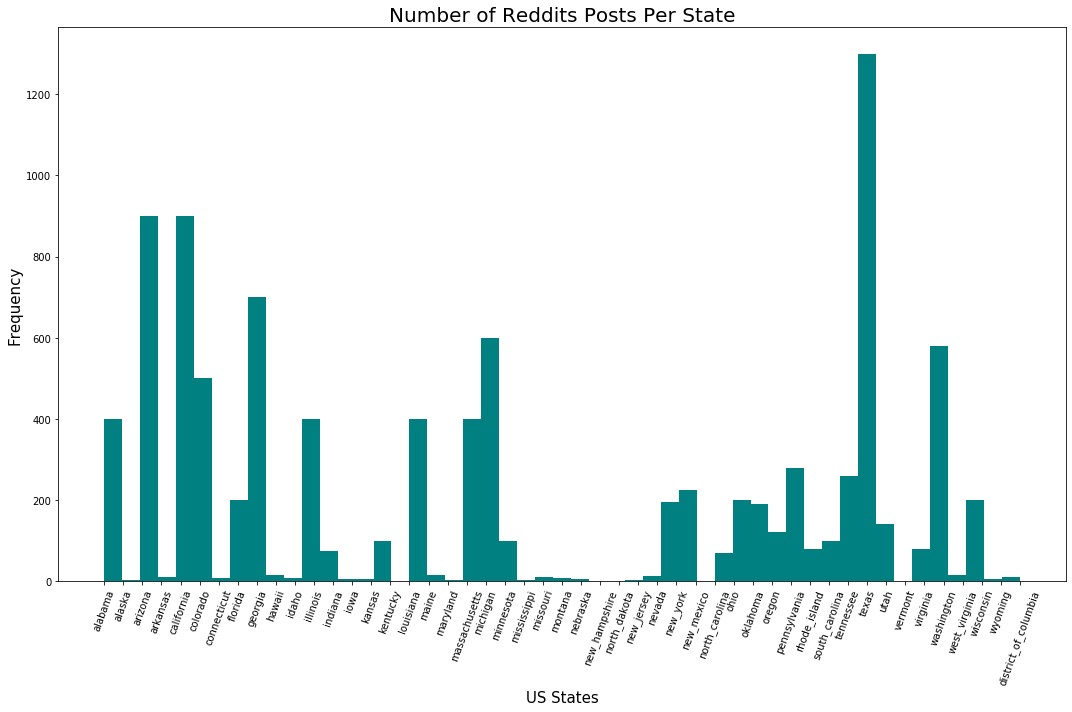

In [21]:
plt.figure(figsize = (15, 10))
plt.hist(df['state'], bins = 51, color = 'teal')
plt.title('Number of Reddits Posts Per State', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.xticks(rotation = 70)
plt.ylabel('Frequency', fontsize = 15)
plt.tight_layout();

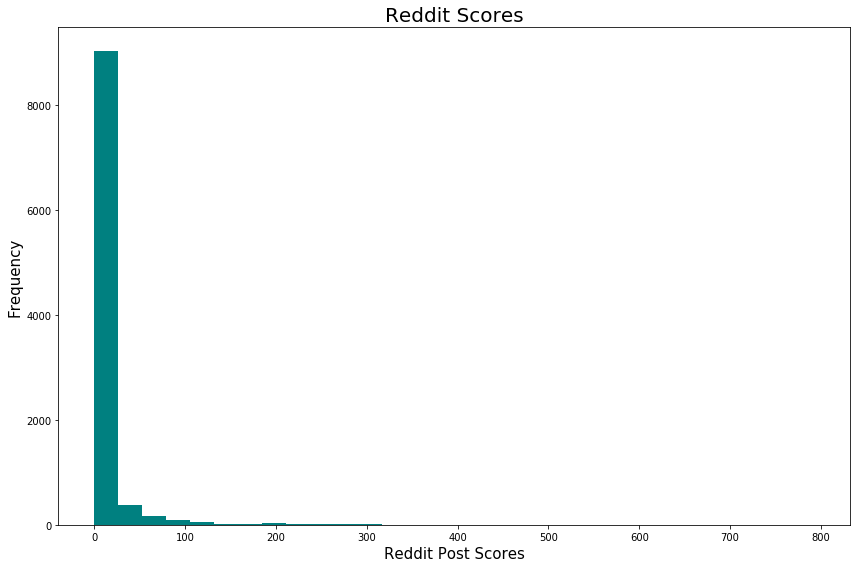

In [22]:
plt.figure(figsize = (12, 8))
plt.hist(df['score'], bins = 30, color = 'teal')
plt.title('Reddit Scores', fontsize = 20)
plt.xlabel('Reddit Post Scores', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.tight_layout();

In [23]:
df[df['score'] > 500]

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
1859,CoronavirusCA,joyousjoyness,Mirror,NaN,792,1595181283,california,2020-07-19 13:54:43
1865,CoronavirusCA,Accomplished_Thanks,California Gov. Gavin Newsom reportedly had to...,NaN,773,1595195622,california,2020-07-19 17:53:42
1884,CoronavirusCA,el_chupanebriated,I risked my life yesterday to show yall how Hu...,NaN,546,1595261875,california,2020-07-20 12:17:55
1897,CoronavirusCA,OTGASTD,Orange County Humor,NaN,754,1595298181,california,2020-07-20 22:23:01
1977,CoronavirusCA,Lostones1117,‘We have lost control of this fight.’ Californ...,NaN,509,1595540841,california,2020-07-23 17:47:21
8098,CoronaVirusTX,Can_I_Nap_Now,Texas: Where everyone on the road pulls over w...,NaN,595,1594755866,texas,2020-07-14 13:44:26
8295,CoronaVirusTX,happysnappah,Nurse in McAllen describes less than ideal con...,NaN,679,1595208676,texas,2020-07-19 19:31:16
8309,CoronaVirusTX,poweroverpain,TX teacher here near a major hotspot. we final...,NaN,677,1595253716,texas,2020-07-20 08:01:56
8361,CoronaVirusTX,adidasnmotion,NBC 5 found more than 430 babies have tested p...,NaN,540,1595356557,texas,2020-07-21 12:35:57
8438,CoronaVirusTX,AintEverLucky,Woman who invited Gov. Abbott to her mother's ...,NaN,608,1595539513,texas,2020-07-23 15:25:13


## Word Counts

In [24]:
df['word_count'] = [len(df['title'][i].split()) for i in range(0, len(df['title']))]

In [25]:
df.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time,word_count
0,CoronavirusAlabama,guarea,"After public apology, Montgomery councilman’s ...",NaN,1,1593606973,alabama,2020-07-01 08:36:13,14
1,CoronavirusAlabama,guarea,University of Alabama graduate tells his COVID...,NaN,1,1593607132,alabama,2020-07-01 08:38:52,8
2,CoronavirusAlabama,guarea,Tuscaloosa adopts face mask law for public spaces,NaN,1,1593608257,alabama,2020-07-01 08:57:37,8
3,CoronavirusAlabama,guarea,Coin shortage due to coronavirus: What’s happe...,NaN,0,1593615060,alabama,2020-07-01 10:51:00,11
4,CoronavirusAlabama,houyam-love,[Study Results] How is Coronavirus Pandemic Af...,NaN,1,1593621148,alabama,2020-07-01 12:32:28,9


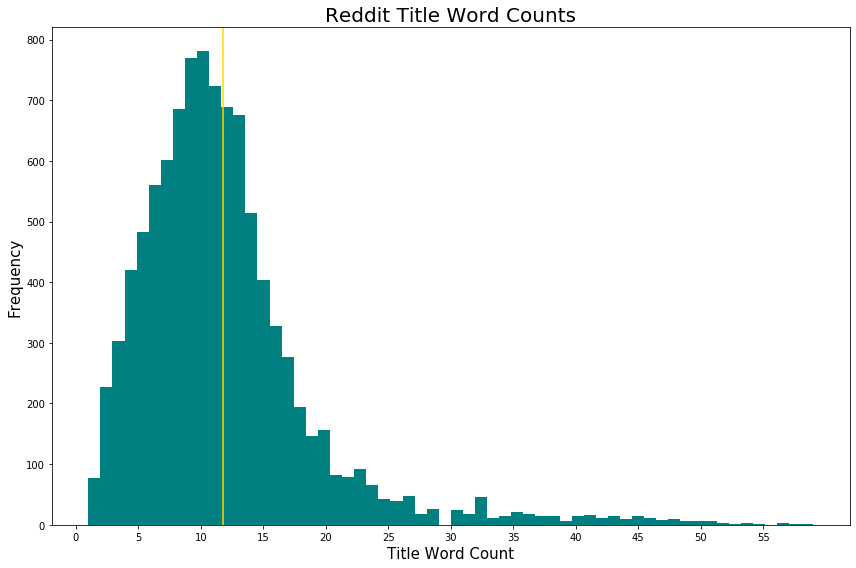

In [26]:
plt.figure(figsize = (12, 8))
plt.hist(df['word_count'], bins = 60, color = 'teal')
plt.title('Reddit Title Word Counts', fontsize = 20)
plt.xlabel('Title Word Count', fontsize = 15)
plt.xticks(np.arange(0, max(df['word_count']), 5))
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(df['word_count'].mean(), color = 'gold')
plt.tight_layout();

In [27]:
height = [df.groupby('state')['word_count'].mean()[i] for i in range(0, len(df.groupby('state')['word_count'].mean()))]

In [28]:
height[0:5]

[10.8075, 7.0, 11.575555555555555, 12.7, 12.376666666666667]

In [29]:
df.groupby('state')['word_count'].mean().head()

state
alabama       10.807500
alaska         7.000000
arizona       11.575556
arkansas      12.700000
california    12.376667
Name: word_count, dtype: float64

In [30]:
df['state'].sort_values().unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'district_of_columbia', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'new_hampshire',
       'new_jersey', 'new_mexico', 'new_york', 'north_carolina',
       'north_dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode_island', 'south_carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west_virginia', 'wisconsin',
       'wyoming'], dtype=object)

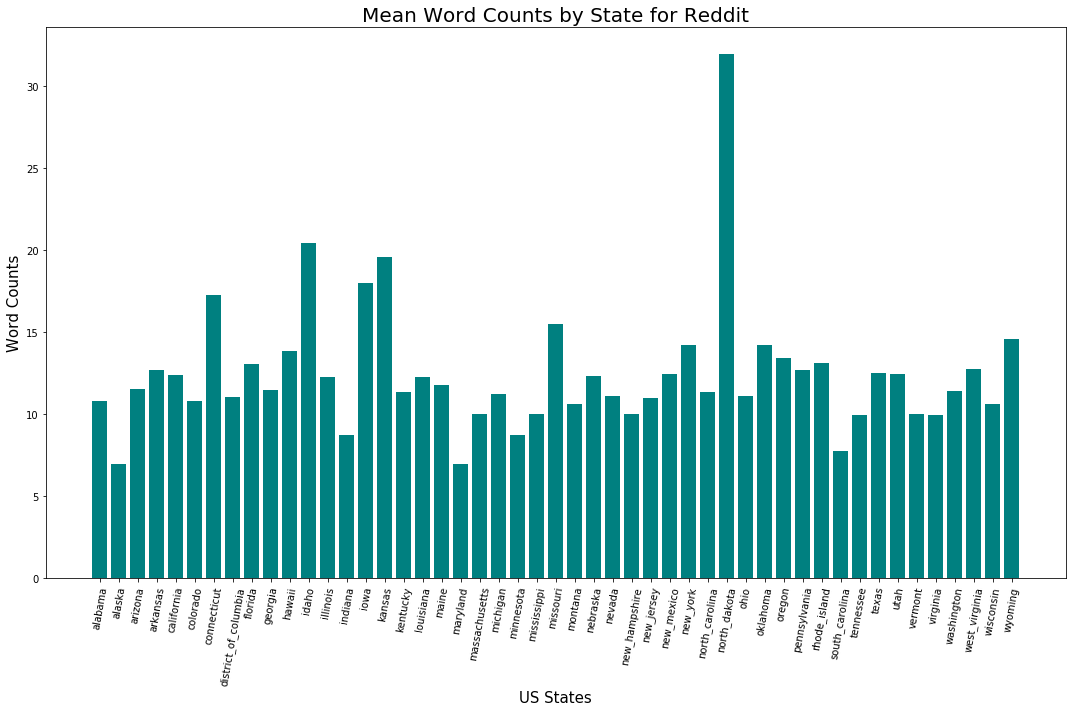

In [31]:
plt.figure(figsize = (15, 10))
plt.bar(df['state'].sort_values().unique(), height, color = 'teal')
plt.title('Mean Word Counts by State for Reddit', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.xticks(rotation = 80)
plt.ylabel('Word Counts', fontsize = 15)
plt.tight_layout();

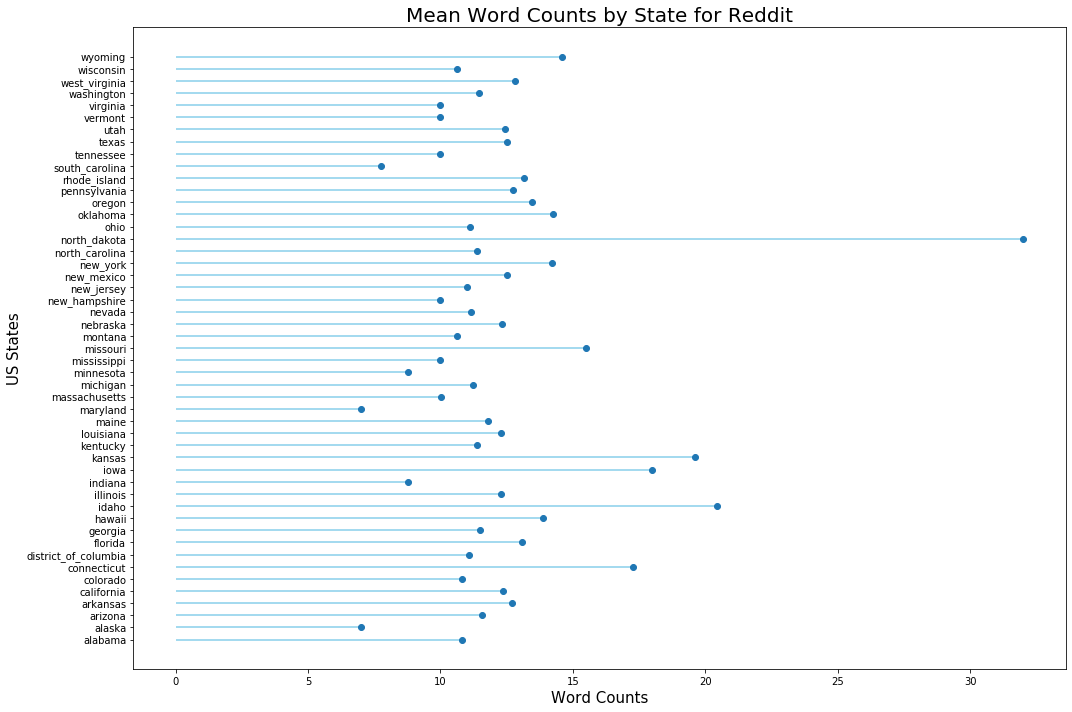

In [32]:
plt.figure(figsize = (15, 10))
plt.hlines(y=df['state'].sort_values().unique(), xmin=0, xmax=height, color='skyblue')
plt.plot(height, df['state'].sort_values().unique(), "o")
plt.title('Mean Word Counts by State for Reddit', fontsize = 20)
plt.ylabel('US States', fontsize = 15)
plt.xlabel('Word Counts', fontsize = 15)
plt.tight_layout();


## Frequently Used Words Using CountVectorizer

In [33]:
cvec = CountVectorizer(stop_words = 'english')

In [34]:
X = df['title']

In [35]:
Z_title = cvec.fit_transform(X)

In [36]:
Z_title_df = pd.DataFrame(Z_title.toarray(), columns = cvec.get_feature_names())
Z_title_df.head()

,00,000,0009018,000s,009,00pm,01,015,016,017,...,معاناة,معلومات,مفيدة,من,موبايلات,ميديا,واجهزة,وتثبيت,وداع,وفاة
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Code adapted from global lect: NLP II

top_words = {}

for i in Z_title_df.columns:
    top_words[i] = Z_title_df[i].sum()
    
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [38]:
most_freq.head(10)

,0,1
0,covid,2513
1,19,1900
2,cases,1336
3,coronavirus,1275
4,new,1190
5,july,749
6,deaths,712
7,county,694
8,mask,684
9,school,538


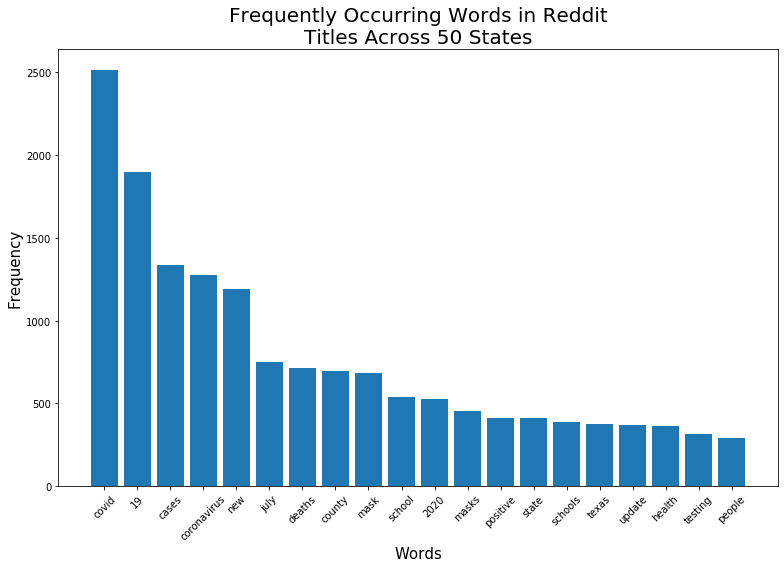

In [39]:
# Code adapted from global lect: NLP II

plt.figure(figsize = (11, 8))

plt.bar(most_freq[0][:20], most_freq[1][:20])
plt.title("Frequently Occurring Words in Reddit\nTitles Across 50 States", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation = 45)
plt.ylabel("Frequency", fontsize = 15)
plt.tight_layout();

### Bi-grams

In [40]:
cvec_bigram = CountVectorizer(stop_words = 'english', ngram_range = (2,2))

In [41]:
Z_bigram = cvec_bigram.fit_transform(X)

In [42]:
Z_bigram_df = pd.DataFrame(Z_bigram.toarray(), columns = cvec_bigram.get_feature_names())
Z_bigram_df.head()

,00 pm,000 111,000 15,000 73,000 80,000 active,000 attendance,000 attendees,000 case,000 cases,...,معاناة وداع,معلومات مفيدة,مفيدة الاول,من قبل,موبايلات خرافية,ميديا فاير,واجهزة الموبيل,وتثبيت اقوى,وداع رجاء,وفاة الفنانة
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Code adapted from global lect: NLP II

top_words = {}

for i in Z_bigram_df.columns:
    top_words[i] = Z_bigram_df[i].sum()
    
most_freq_bigram = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [44]:
most_freq_bigram.head(10)

,0,1
0,covid 19,1834
1,19 cases,314
2,new cases,277
3,coronavirus cases,154
4,daily discussion,148
5,new deaths,128
6,new covid,113
7,positive covid,111
8,mask mandate,110
9,health officials,107


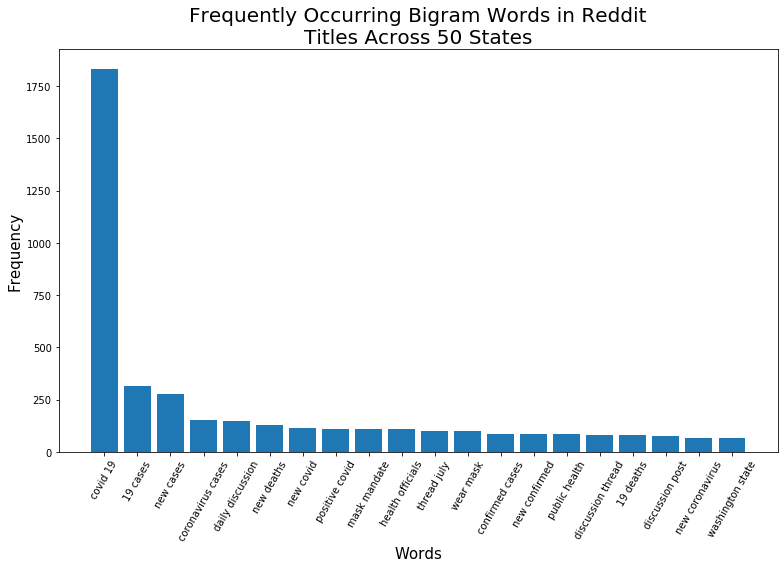

In [45]:
# Code adapted from global lect: NLP II

plt.figure(figsize = (11, 8))

plt.bar(most_freq_bigram[0][:20], most_freq_bigram[1][:20])
plt.title("Frequently Occurring Bigram Words in Reddit\nTitles Across 50 States", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation = 60)
plt.ylabel("Frequency", fontsize = 15)
plt.tight_layout();

# Data Cleaning and EDA for Twitter

In [46]:
twitter = pd.read_csv('./data/twitter_july_df.csv')

In [47]:
twitter.shape

(19756, 13)

In [48]:
twitter.head()

,coordinates,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,user_followers_count,user_location,user_verified,state
0,"-122.419,37.7793",Tue Jul 21 04:45:01 +0000 2020,NaN,0,1285435588548669441,en,"San Francisco, CA",0,What do you wear for a Summer dinner in San Fr...,1659,San Francisco,False,CA
1,"-87.6587039,41.9272579",Tue Jul 21 06:03:38 +0000 2020,summer2020 phase3 summerhaircut vibin morethan...,0,1285455375559352320,en,"Chicago, IL",0,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤\n.\n.\n.\n#s...",372,"Chicago, IL",False,IL
2,"-117.89719,33.81864",Tue Jul 21 04:36:24 +0000 2020,theranch birthday tomato heirloomtomatoes file...,0,1285433422836531202,en,"Anaheim, CA",0,Glad @theranchanaheim didn’t let Covid stop th...,535,"Lake Forest, CA",False,CA
3,"-123.087,44.0519",Tue Jul 21 04:54:32 +0000 2020,customcanoe handcraftedcanoe quarantine Quaran...,0,1285437985350189057,en,"Eugene, OR",0,Mellow Monday\n.\nMarvels of the majestic moti...,88,"Eugene, OR",False,OR
4,"-87.66902,41.94131",Tue Jul 21 06:03:29 +0000 2020,summer2020 covid19 phase3 summernails vibin,0,1285455336955150336,en,"Chicago, IL",0,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹\n💛💙💚🤎🧡\n.\n.\n.\n...,372,"Chicago, IL",False,IL


In [49]:
twitter_cols = ['text', 'favorite_count', 'retweet_count','state', 'created_at']

In [50]:
twitter = twitter[twitter_cols].copy()

In [51]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19756 entries, 0 to 19755
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            19756 non-null  object
 1   favorite_count  19756 non-null  int64 
 2   retweet_count   19756 non-null  int64 
 3   state           19756 non-null  object
 4   created_at      19756 non-null  object
dtypes: int64(2), object(3)
memory usage: 771.8+ KB


In [52]:
twitter['state'].value_counts()

CA    3983
NY    2972
FL    1634
TX    1574
GA     722
IL     582
NJ     514
PA     489
DC     456
NC     410
MD     408
OH     386
VA     384
MA     362
WA     342
AZ     293
TN     284
NV     270
MI     270
OR     265
IN     246
CO     229
SC     212
MN     179
WI     178
HI     176
MO     176
LA     175
AL     168
CT     137
KY     118
KS     110
UT      97
OK      94
DE      72
NM      71
AR      71
RI      61
ME      56
ID      53
NH      53
NE      51
MT      51
IA      50
MS      43
SD      43
WV      40
VT      36
PR      28
AK      24
VI      21
ND      15
WY      15
GU       6
PW       1
Name: state, dtype: int64

In [53]:
twitter.drop(twitter[twitter['state'] == 'GU'].index, inplace=True)

In [54]:
twitter.drop(twitter[twitter['state'] == 'PW'].index, inplace=True)

In [55]:
twitter.drop(twitter[twitter['state'] == 'PR'].index, inplace = True)

In [56]:
twitter.drop(twitter[twitter['state'] == 'VI'].index, inplace=True)

In [57]:
twitter.shape

(19700, 5)

In [58]:
twitter.reset_index(drop=True, inplace = True)

## Data Visualization

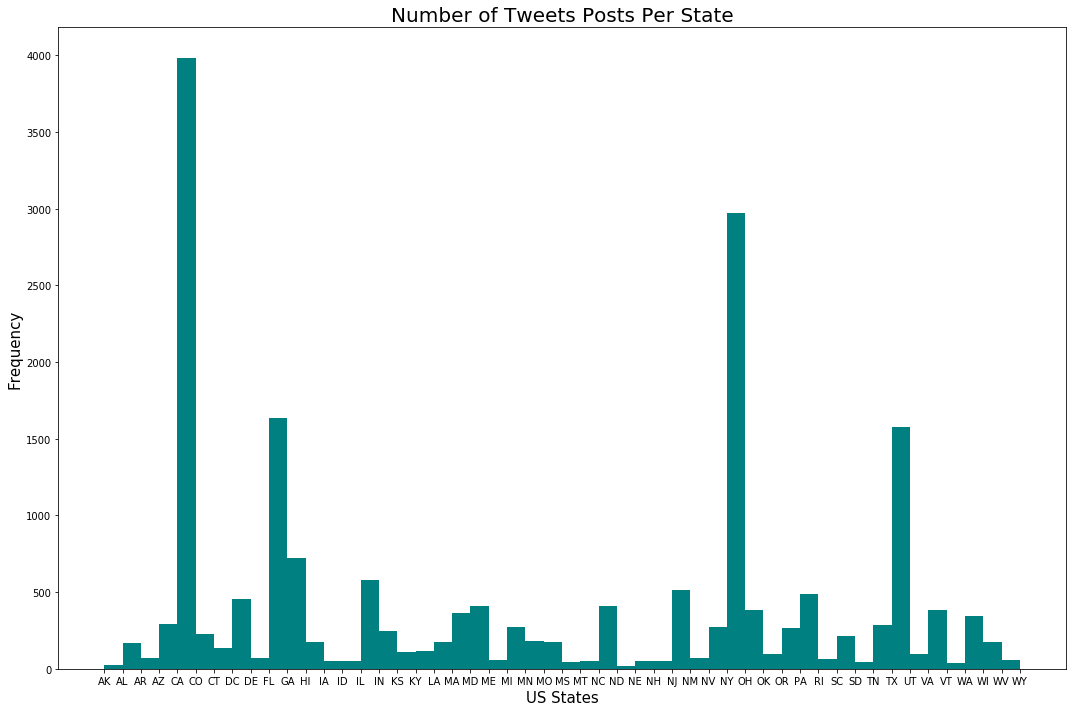

In [59]:
plt.figure(figsize = (15, 10))
plt.hist(twitter['state'].sort_values(), bins = 50, color = 'teal')
plt.title('Number of Tweets Posts Per State', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.tight_layout();

In [60]:
twitter['stripped_text'] = twitter['text'].replace('\nhttp\S+', '', regex=True).replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n\S+', '', regex=True)

In [61]:
twitter.head()

,text,favorite_count,retweet_count,state,created_at,stripped_text
0,What do you wear for a Summer dinner in San Fr...,0,0,CA,Tue Jul 21 04:45:01 +0000 2020,What do you wear for a Summer dinner in San Fr...
1,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤\n.\n.\n.\n#s...",0,0,IL,Tue Jul 21 06:03:38 +0000 2020,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #..."
2,Glad @theranchanaheim didn’t let Covid stop th...,0,0,CA,Tue Jul 21 04:36:24 +0000 2020,Glad @theranchanaheim didn’t let Covid stop th...
3,Mellow Monday\n.\nMarvels of the majestic moti...,0,0,OR,Tue Jul 21 04:54:32 +0000 2020,Mellow Monday of the majestic motions afloat w...
4,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹\n💛💙💚🤎🧡\n.\n.\n.\n...,0,0,IL,Tue Jul 21 06:03:29 +0000 2020,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...


In [62]:
twitter['word_count'] = [len(twitter['stripped_text'][i].split()) for i in range(0, len(twitter['stripped_text']))]

In [63]:
height_twit = [twitter.groupby('state')['word_count'].mean()[i] for i in range(0, len(twitter.groupby('state')['word_count'].mean()))]
height_twit[0:5]

[26.791666666666668,
 28.952380952380953,
 26.859154929577464,
 25.914675767918087,
 26.160682902334923]

## Word Counts

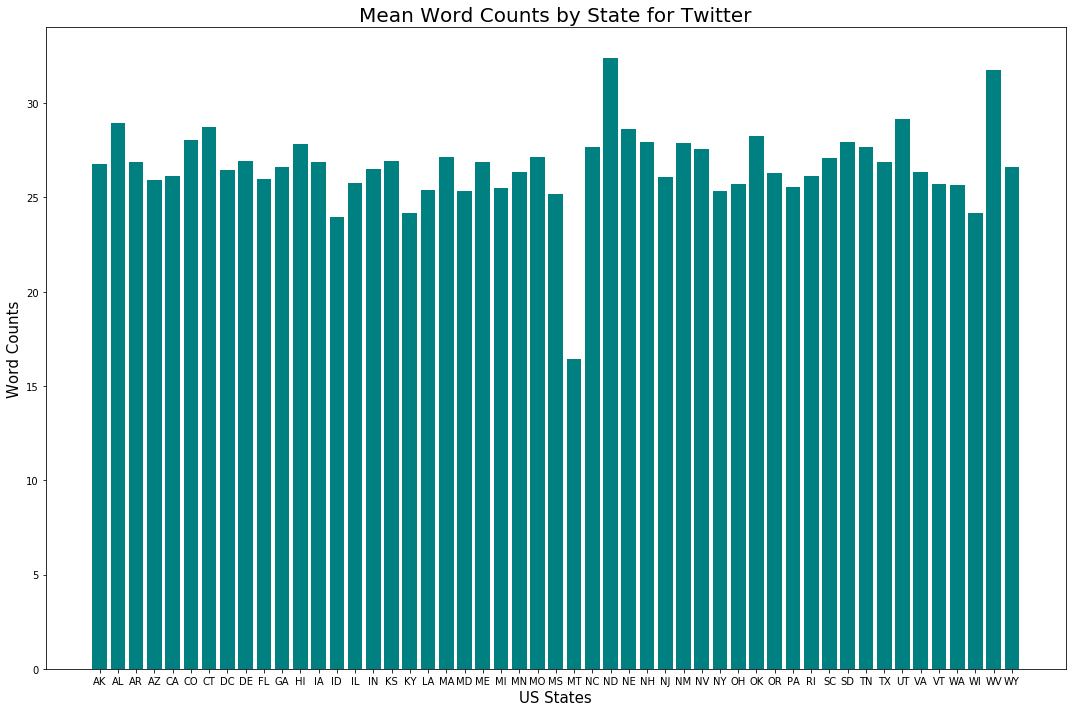

In [64]:
plt.figure(figsize = (15, 10))
plt.bar(twitter['state'].sort_values().unique(), height_twit, color = 'teal')
plt.title('Mean Word Counts by State for Twitter', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.ylabel('Word Counts', fontsize = 15)
plt.tight_layout();

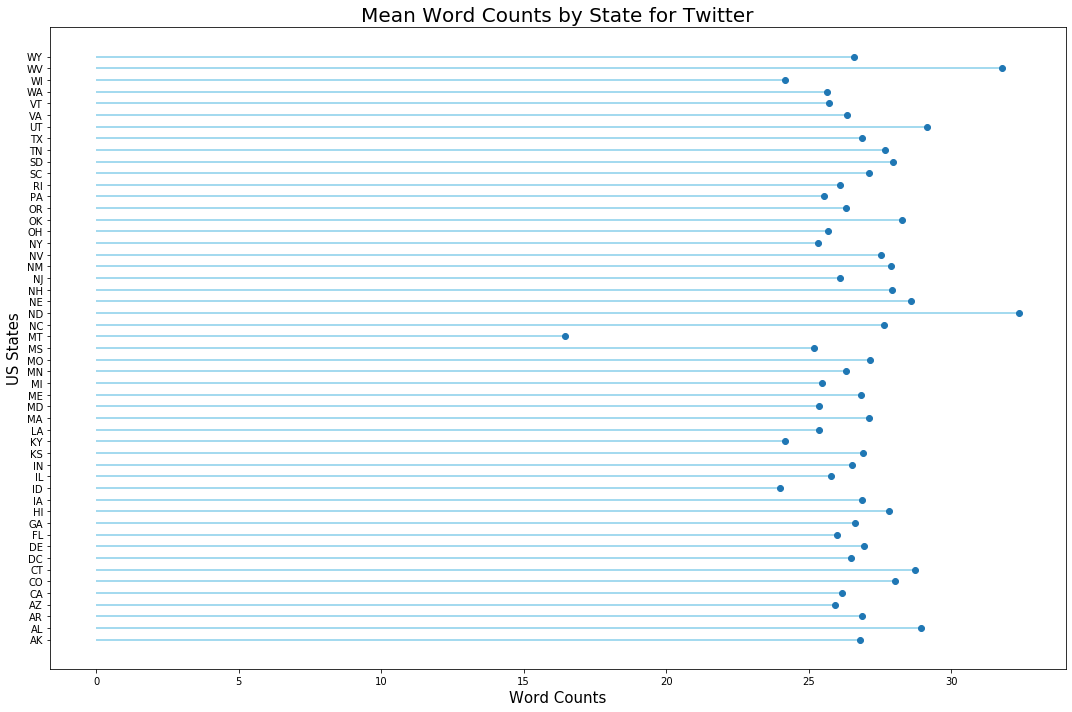

In [65]:
plt.figure(figsize = (15, 10))
plt.hlines(y=twitter['state'].sort_values().unique(), xmin=0, xmax=height_twit, color='skyblue')
plt.plot(height_twit, twitter['state'].sort_values().unique(), "o")
plt.title('Mean Word Counts by State for Twitter', fontsize = 20)
plt.ylabel('US States', fontsize = 15)
plt.xlabel('Word Counts', fontsize = 15)
plt.tight_layout();

## Frequently Used Words Using CountVectorizer

In [66]:
stop_words = text.ENGLISH_STOP_WORDS.union(['https', '2020'])
#Code adapted from: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/37679

In [67]:
cvec2 = CountVectorizer(stop_words = stop_words)

In [68]:
X_twit = twitter['text']

In [69]:
Z_text = cvec2.fit_transform(X_twit)

In [70]:
Z_text_df = pd.DataFrame(Z_text.toarray(), columns = cvec2.get_feature_names())
Z_text_df.head()

,00,000,00001010,0001,000beds,000ft²,001,0010,003,0031,...,𝙞𝙨,𝙣𝙤𝙣𝙚,𝙩𝙝𝙚𝙧𝙖𝙥𝙮,𝙷𝚊𝚙𝚙𝚒𝚎𝚜𝚝,𝚊𝚍𝚟𝚎𝚗𝚝𝚞𝚛𝚎𝚜,𝚘𝚗,𝟏𝐬𝐭,𝟐𝟎𝟐𝟎,𝟚𝟘𝟚𝟘,𝟚𝟠
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Code adapted from global lect: NLP II

top_words_twit = {}

for i in Z_text_df.columns:
    top_words_twit[i] = Z_text_df[i].sum()
    
most_freq_twit = pd.DataFrame(sorted(top_words_twit.items(), key = lambda x: x[1], reverse = True))

In [72]:
most_freq_twit.head(10)

,0,1
0,covid,6466
1,pandemic,3634
2,19,3141
3,covid19,3097
4,coronavirus,2385
5,new,2235
6,social,2196
7,distancing,1991
8,amp,1563
9,time,1383


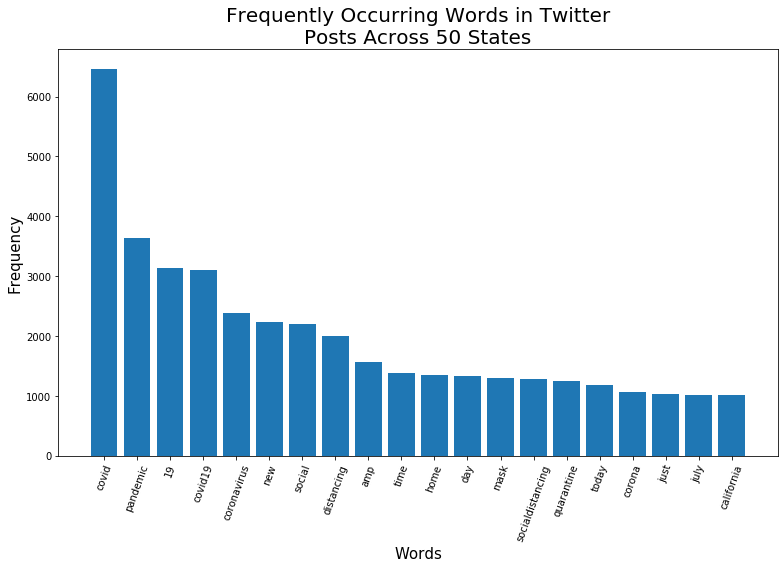

In [73]:
# Code adapted from global lect: NLP II

plt.figure(figsize = (11, 8))

plt.bar(most_freq_twit[0][:20], most_freq_twit[1][:20])
plt.title("Frequently Occurring Words in Twitter\nPosts Across 50 States", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation = 70)
plt.ylabel("Frequency", fontsize = 15)
plt.tight_layout();

### Bi-grams

In [74]:
cvec_bigram_twit = CountVectorizer(stop_words = stop_words, ngram_range = (2,2))

In [75]:
Z_bigram_twit = cvec_bigram_twit.fit_transform(X_twit)

In [76]:
Z_bigram_twit_df = pd.DataFrame(Z_bigram_twit.toarray(), columns = cvec_bigram_twit.get_feature_names())
Z_bigram_twit_df.head()

,00 00,00 07,00 12,00 address,00 ajnnxjznpv,00 amj91ggbmj,00 bj2rfkc1p2,00 come,00 covid19,00 currently,...,𝙞𝙨 𝙖𝙗𝙖𝙣𝙙𝙤𝙣𝙢𝙚𝙣𝙩,𝙣𝙤𝙣𝙚 boys,𝙩𝙝𝙚𝙧𝙖𝙥𝙮 ve,𝙷𝚊𝚙𝚙𝚒𝚎𝚜𝚝 𝚘𝚗,𝚊𝚍𝚟𝚎𝚗𝚝𝚞𝚛𝚎𝚜 chase,𝚘𝚗 𝚊𝚍𝚟𝚎𝚗𝚝𝚞𝚛𝚎𝚜,𝟏𝐬𝐭 notice,𝟐𝟎𝟐𝟎 jobs,𝟚𝟘𝟚𝟘 𝕟𝕖𝕨,𝟚𝟠 𝟚𝟘𝟚𝟘
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Code adapted from global lect: NLP II

top_words_twit2 = {}

for i in Z_bigram_twit_df.columns:
    top_words_twit2[i] = Z_bigram_twit_df[i].sum()
    
most_freq_bigram_twit = pd.DataFrame(sorted(top_words_twit2.items(), key = lambda x: x[1], reverse = True))

In [78]:
most_freq_bigram_twit.head(10)

,0,1
0,covid 19,3086
1,social distancing,1956
2,new york,681
3,vía nytimes,340
4,wear mask,299
5,covid19 coronavirus,263
6,hand sanitizer,240
7,19 update,233
8,coronavirus pandemic,229
9,working home,223


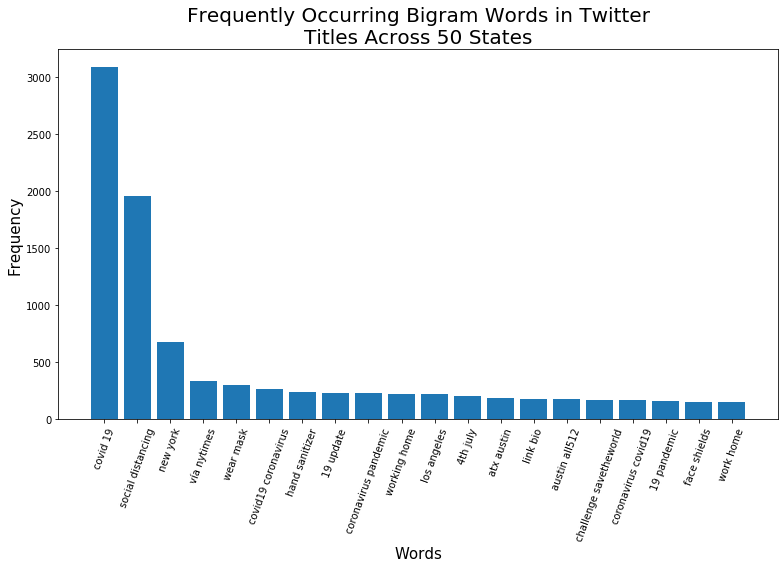

In [79]:
# Code adapted from global lect: NLP II

plt.figure(figsize = (11, 8))

plt.bar(most_freq_bigram_twit[0][:20], most_freq_bigram_twit[1][:20])
plt.title("Frequently Occurring Bigram Words in Twitter\nTitles Across 50 States", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation = 70)
plt.ylabel("Frequency", fontsize = 15)
plt.tight_layout();

In [80]:
# twitter.to_csv('./data/twitter_data_eda.csv', index=False)

# EDA for COVID-19 Policies

In [81]:
policies.head(2)

,Location,Status of Reopening,Stay at Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,Restaurant Limits,Bar Closures,Face Covering Requirement,Primary Election Postponement,Emergency Declaration,Footnotes
0,United States,Proceeding (20); Paused (7); New Restrictions ...,Original Stay at Home Order in Place (1); Stay...,Original Traveler Quarantine Mandate in Place ...,Some or All Non-Essential Businesses Permitted...,Original Gathering Ban/Limit in Place (4); Gat...,Restaurants Reopened to Dine-in Service (42); ...,Closed (9); Reopened (28); Newly Closed (9); N...,Required for General Public (33); Required for...,Postponed (15); No (36),Yes (51); No (0),1
1,Alabama,Paused,Lifted,-,All Non-Essential Businesses Permitted to Reop...,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,-,Yes,NaN


In [82]:
policy_cols = ['Status of Reopening', 'Stay at Home Order', 'Large Gatherings Ban', 'Restaurant Limits', 'Bar Closures', 'Face Covering Requirement', 'Emergency Declaration']

In [83]:
df_policies = policies[policy_cols].copy()

In [84]:
df_policies['Location'] = policies['Location'].copy()
df_policies.head()

,Status of Reopening,Stay at Home Order,Large Gatherings Ban,Restaurant Limits,Bar Closures,Face Covering Requirement,Emergency Declaration,Location
0,Proceeding (20); Paused (7); New Restrictions ...,Original Stay at Home Order in Place (1); Stay...,Original Gathering Ban/Limit in Place (4); Gat...,Restaurants Reopened to Dine-in Service (42); ...,Closed (9); Reopened (28); Newly Closed (9); N...,Required for General Public (33); Required for...,Yes (51); No (0),United States
1,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Yes,Alabama
2,Proceeding with Reopening,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for Certain Employees,Yes,Alaska
3,New Restrictions Imposed,Lifted,New Limit on Large Gatherings in Place,New Service Limits,Newly Closed,Required for Certain Employees; Allows Local O...,Yes,Arizona
4,Paused,-,Lifted,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,Yes,Arkansas


In [85]:
df_policies.drop(0, inplace = True)

## Reopening

In [86]:

policies[policy_cols[0]].value_counts()

# Proceeding with Reopening: 1
# New Restrictions Imposed: 0
# Reopened: 1
# Paused: 0

Proceeding with Reopening                                                   20
New Restrictions Imposed                                                    18
Reopened                                                                     7
Paused                                                                       6
Proceeding (20); Paused (7); New Restrictions Imposed (17); Reopened (7)     1
Name: Status of Reopening, dtype: int64

In [87]:
df_policies['dum_reopening'] = df_policies[policy_cols[0]].map({'Proceeding with Reopening': 1,
                                                               'New Restrictions Imposed': 0,
                                                               'Reopened': 1,
                                                               'Paused': 0})

## Stay at Home

In [88]:

policies[policy_cols[1]].value_counts()

# Lifted: 1
# -: 0
# Rolled Back to High Risk Groups: 1
# Statewide: 0

Lifted                                                                                              41
-                                                                                                    6
Rolled Back to High Risk Groups                                                                      3
Statewide                                                                                            1
Original Stay at Home Order in Place (1); Stay at Home Order Eased or Lifted (44); No Action (6)     1
Name: Stay at Home Order, dtype: int64

In [89]:
df_policies['dum_stay_home'] = df_policies[policy_cols[1]].map({'Lifted': 1,
                                                     '-': 0,
                                                     'Rolled Back to High Risk Groups': 1,
                                                     'Statewide': 0})

## Large Gatherings Ban

In [90]:

policies[policy_cols[2]].value_counts()

# Expanded to New Limit Above 25: 1
# Lifted: 1
# New Limit on Large Gatherings in Place: 0
# Expanded to New Limit of 25: 1
# Expanded to New Limit Below 25: 0
# >10 People Prohibited: 0
# -: 0
# All Gatherings Prohibited: 0
# Other: 0

Expanded to New Limit Above 25                                                                                                                 15
Lifted                                                                                                                                         13
New Limit on Large Gatherings in Place                                                                                                         10
Expanded to New Limit of 25                                                                                                                     4
Expanded to New Limit Below 25                                                                                                                  4
>10 People Prohibited                                                                                                                           2
-                                                                                                                           

In [91]:
df_policies['dum_gatherings'] = df_policies[policy_cols[2]].map({
    'Expanded to New Limit Above 25': 1,
    'Lifted': 1,
    'New Limit on Large Gatherings in Place': 0,
    'Expanded to New Limit of 25': 1,
    'Expanded to New Limit Below 25': 0,
    '>10 People Prohibited': 0,
    '-': 0,
    'All Gatherings Prohibited': 0,
    'Other': 0
})

## Restaurant Limits

In [92]:
policies[policy_cols[3]].value_counts()

# Reopened to Dine-in Service with Capacity Limits: 1
# Reopened to Dine-in Service: 1
# New Service Limits:0
# Newly Closed to Dine-in Service: 0
# -: 0

Reopened to Dine-in Service with Capacity Limits                                                                            26
Reopened to Dine-in Service                                                                                                 15
New Service Limits                                                                                                           8
Newly Closed to Dine-in Service                                                                                              1
-                                                                                                                            1
Restaurants Reopened to Dine-in Service (42); Newly Closed to Dine-in Service (1); New Service Limits (7); No Action (1)     1
Name: Restaurant Limits, dtype: int64

In [93]:
df_policies['dum_restaurants'] = df_policies[policy_cols[3]].map({
    'Reopened to Dine-in Service with Capacity Limits': 1,
    'Reopened to Dine-in Service': 1, 
    'New Service Limits':0,
    'Newly Closed to Dine-in Service': 0,
    '-': 0
})

## Bar closures

In [94]:
policies[policy_cols[4]].value_counts()

# Reopened: 1
# Newly Closed: 0
# Closed: 0
# New Service Limits: 1

Reopened                                                               28
Newly Closed                                                            9
Closed                                                                  9
New Service Limits                                                      5
Closed (9); Reopened (28); Newly Closed (9); New Service Limits (5)     1
Name: Bar Closures, dtype: int64

In [95]:
df_policies['dum_bars'] = df_policies[policy_cols[4]].map({
    'Reopened': 1,
    'Newly Closed': 0,
    'Closed': 0,
    'New Service Limits': 1
})

## Face Coverings

In [96]:
policies[policy_cols[5]].value_counts()

# Required for General Public: 1
# Required for Certain Employees: 1
# -: 0
# Allows Local Officals to Require for General Public: 1
# Required for Certain Employees; Allows Local Officials to Require for General Public: 1


Required for General Public                                                                                                                      34
Required for Certain Employees                                                                                                                    8
-                                                                                                                                                 5
Allows Local Officals to Require for General Public                                                                                               3
Required for Certain Employees; Allows Local Officials to Require for General Public                                                              1
Required for General Public (33); Required for Certain Employees (10); Allows Local Officals to Require for General Public (4); No Action (5)     1
Name: Face Covering Requirement, dtype: int64

In [97]:
df_policies['dum_masks'] = df_policies[policy_cols[5]].map({
    'Required for General Public': 1,
    'Required for Certain Employees': 1,
    '-': 0,
    'Allows Local Officals to Require for General Public': 1,
    'Required for Certain Employees; Allows Local Officials to Require for General Public': 1
})

## Emergency Declaration

In [98]:
policies[policy_cols[6]].value_counts()
# Yes: 1

Yes                 51
Yes (51); No (0)     1
Name: Emergency Declaration, dtype: int64

In [99]:
df_policies['dum_emergency_declaration'] = df_policies[policy_cols[6]].map({
    'Yes': 1
})

In [100]:
df_policies.head()

,Status of Reopening,Stay at Home Order,Large Gatherings Ban,Restaurant Limits,Bar Closures,Face Covering Requirement,Emergency Declaration,Location,dum_reopening,dum_stay_home,dum_gatherings,dum_restaurants,dum_bars,dum_masks,dum_emergency_declaration
1,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Yes,Alabama,0,1,1,1,1,1,1
2,Proceeding with Reopening,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for Certain Employees,Yes,Alaska,1,1,1,1,1,1,1
3,New Restrictions Imposed,Lifted,New Limit on Large Gatherings in Place,New Service Limits,Newly Closed,Required for Certain Employees; Allows Local O...,Yes,Arizona,0,1,0,0,0,1,1
4,Paused,-,Lifted,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,Yes,Arkansas,0,0,1,1,1,1,1
5,New Restrictions Imposed,Statewide,All Gatherings Prohibited,Newly Closed to Dine-in Service,Newly Closed,Required for General Public,Yes,California,0,0,0,0,0,1,1


In [101]:
df_policies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Status of Reopening        51 non-null     object
 1   Stay at Home Order         51 non-null     object
 2   Large Gatherings Ban       51 non-null     object
 3   Restaurant Limits          51 non-null     object
 4   Bar Closures               51 non-null     object
 5   Face Covering Requirement  51 non-null     object
 6   Emergency Declaration      51 non-null     object
 7   Location                   51 non-null     object
 8   dum_reopening              51 non-null     int64 
 9   dum_stay_home              51 non-null     int64 
 10  dum_gatherings             51 non-null     int64 
 11  dum_restaurants            51 non-null     int64 
 12  dum_bars                   51 non-null     int64 
 13  dum_masks                  51 non-null     int64 
 14  dum_emergenc

In [102]:
# df_policies.to_csv('./data/dummied_policies.csv', index=False)

# Cleaning for COVID-19 Health Data

In [103]:
health = pd.read_csv('./data/health_july.csv')

In [104]:
health.head()

,Unnamed: 0,death_tot,hosp_tot,pos_tot,test_tot,pos_test_rate
0,AK,9,0,2737,120921,0.0226
1,AL,630,7752,49678,282815,0.1757
2,AR,183,1439,21734,192266,0.1130
3,AS,0,0,0,341,0.0000
4,AZ,2062,6524,94795,401387,0.2362


In [105]:
health['Unnamed: 0'].replace({
    'AL':'alabama', 
    'AK':'alaska', 
    'AZ':'arizona', 
    'AR':'arkansas', 
    'CA':'california',
    'CO':'colorado', 
    'CT':'connecticut', 
    'DE':'delaware', 
    'DC':'district_of_columbia',
    'FL':'florida', 
    'GA':'georgia', 
    'HI':'hawaii', 
    'ID':'idaho', 
    'IL':'illinois', 
    'IN':'indiana',
    'IA':'iowa', 
    'KS':'kansas', 
    'KY':'kentucky', 
    'LA':'louisiana', 
    'ME':'maine', 
    'MD':'maryland',
    'MA':'massachusetts', 
    'MI':'michigan', 
    'MN':'minnesota', 
    'MS':'mississippi',
    'MO':'missouri', 
    'MT':'montana', 
    'NE':'nebraska', 
    'NV':'nevada', 
    'NH':'new_hampshire',
    'NJ':'new_jersey', 
    'NM':'new_mexico', 
    'NY':'new_york', 
    'NC':'north_carolina',
    'ND':'north_dakota', 
    'OH':'ohio', 
    'OK':'oklahoma', 
    'OR':'oregon', 
    'PA':'pennsylvania',
    'RI':'rhode_island', 
    'SC':'south_carolina', 
    'SD':'south_dakota', 
    'TN':'tennessee',
    'TX':'texas', 
    'UT':'utah', 
    'VT':'vermont', 
    'VA':'virginia', 
    'WA':'washington',
    'WV':'west_virginia', 
    'WI':'wisconsin', 
    'WY':'wyoming'
}, inplace = True)

In [106]:
health.head()

,Unnamed: 0,death_tot,hosp_tot,pos_tot,test_tot,pos_test_rate
0,alaska,9,0,2737,120921,0.0226
1,alabama,630,7752,49678,282815,0.1757
2,arkansas,183,1439,21734,192266,0.1130
3,AS,0,0,0,341,0.0000
4,arizona,2062,6524,94795,401387,0.2362


In [107]:
health['Unnamed: 0'].unique()

array(['alaska', 'alabama', 'arkansas', 'AS', 'arizona', 'california',
       'colorado', 'connecticut', 'district_of_columbia', 'delaware',
       'florida', 'georgia', 'GU', 'hawaii', 'iowa', 'idaho', 'illinois',
       'indiana', 'kansas', 'kentucky', 'louisiana', 'massachusetts',
       'maryland', 'maine', 'michigan', 'minnesota', 'missouri', 'MP',
       'mississippi', 'montana', 'north_carolina', 'north_dakota',
       'nebraska', 'new_hampshire', 'new_jersey', 'new_mexico', 'nevada',
       'new_york', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'PR',
       'rhode_island', 'south_carolina', 'south_dakota', 'tennessee',
       'texas', 'utah', 'virginia', 'VI', 'vermont', 'washington',
       'wisconsin', 'west_virginia', 'wyoming'], dtype=object)

In [108]:
health.drop(health[health['Unnamed: 0'] == 'AS'].index, inplace = True)

In [109]:
health.drop(health[health['Unnamed: 0'] == 'GU'].index, inplace = True)

In [110]:
health.drop(health[health['Unnamed: 0'] == 'MP'].index, inplace = True)

In [111]:
health.drop(health[health['Unnamed: 0'] == 'PR'].index, inplace = True)

In [112]:
health.drop(health[health['Unnamed: 0'] == 'VI'].index, inplace = True)

In [113]:
len(health['Unnamed: 0'].unique())

51

In [114]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 55
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     51 non-null     object 
 1   death_tot      51 non-null     int64  
 2   hosp_tot       51 non-null     int64  
 3   pos_tot        51 non-null     int64  
 4   test_tot       51 non-null     int64  
 5   pos_test_rate  51 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.8+ KB


In [115]:
# health.to_csv('./data/health.csv', index = False)